In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('gender_classification_v7.csv')

In [30]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [48]:
df['gender_encoded'] = df['gender'].map({'Female': 0, 'Male': 1})

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender_encoded             5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


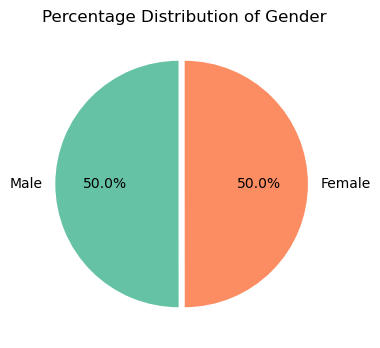

In [57]:
plt.figure(figsize=(4, 4))
plt.pie(df['gender_encoded'].value_counts(),
        labels=['Male', 'Female'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set2'),
        explode=[0.05, 0]) 
plt.title('Percentage Distribution of Gender')
plt.show()

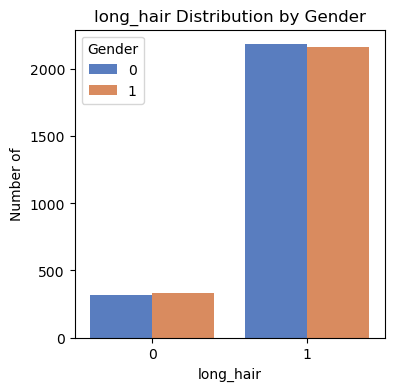

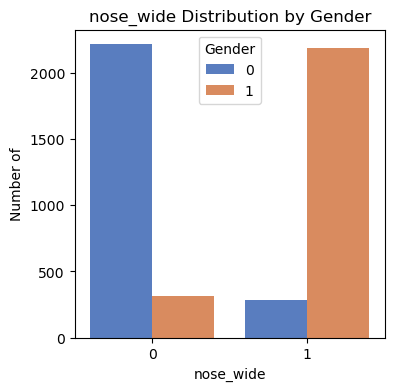

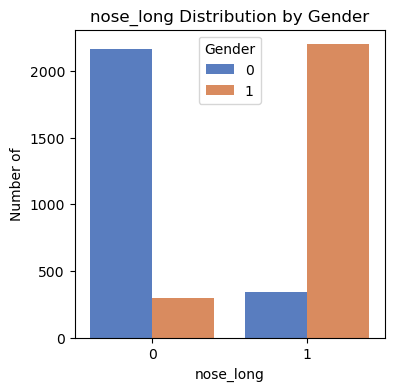

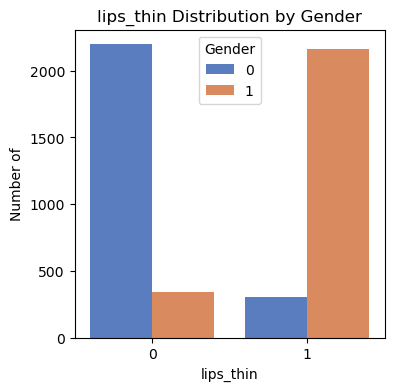

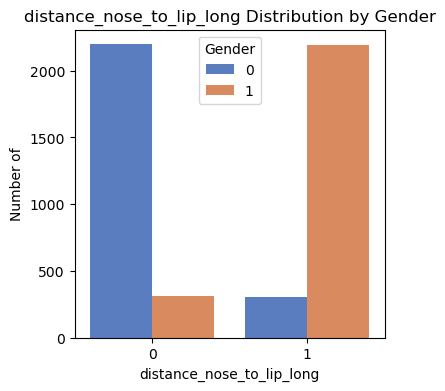

In [58]:
binary_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

for feature in binary_features:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=feature, hue='gender_encoded', data=df, palette='muted')
    plt.title(f'{feature} Distribution by Gender')
    plt.xlabel(feature)
    
    plt.ylabel('Number of')
    plt.legend(title='Gender')
    plt.show()

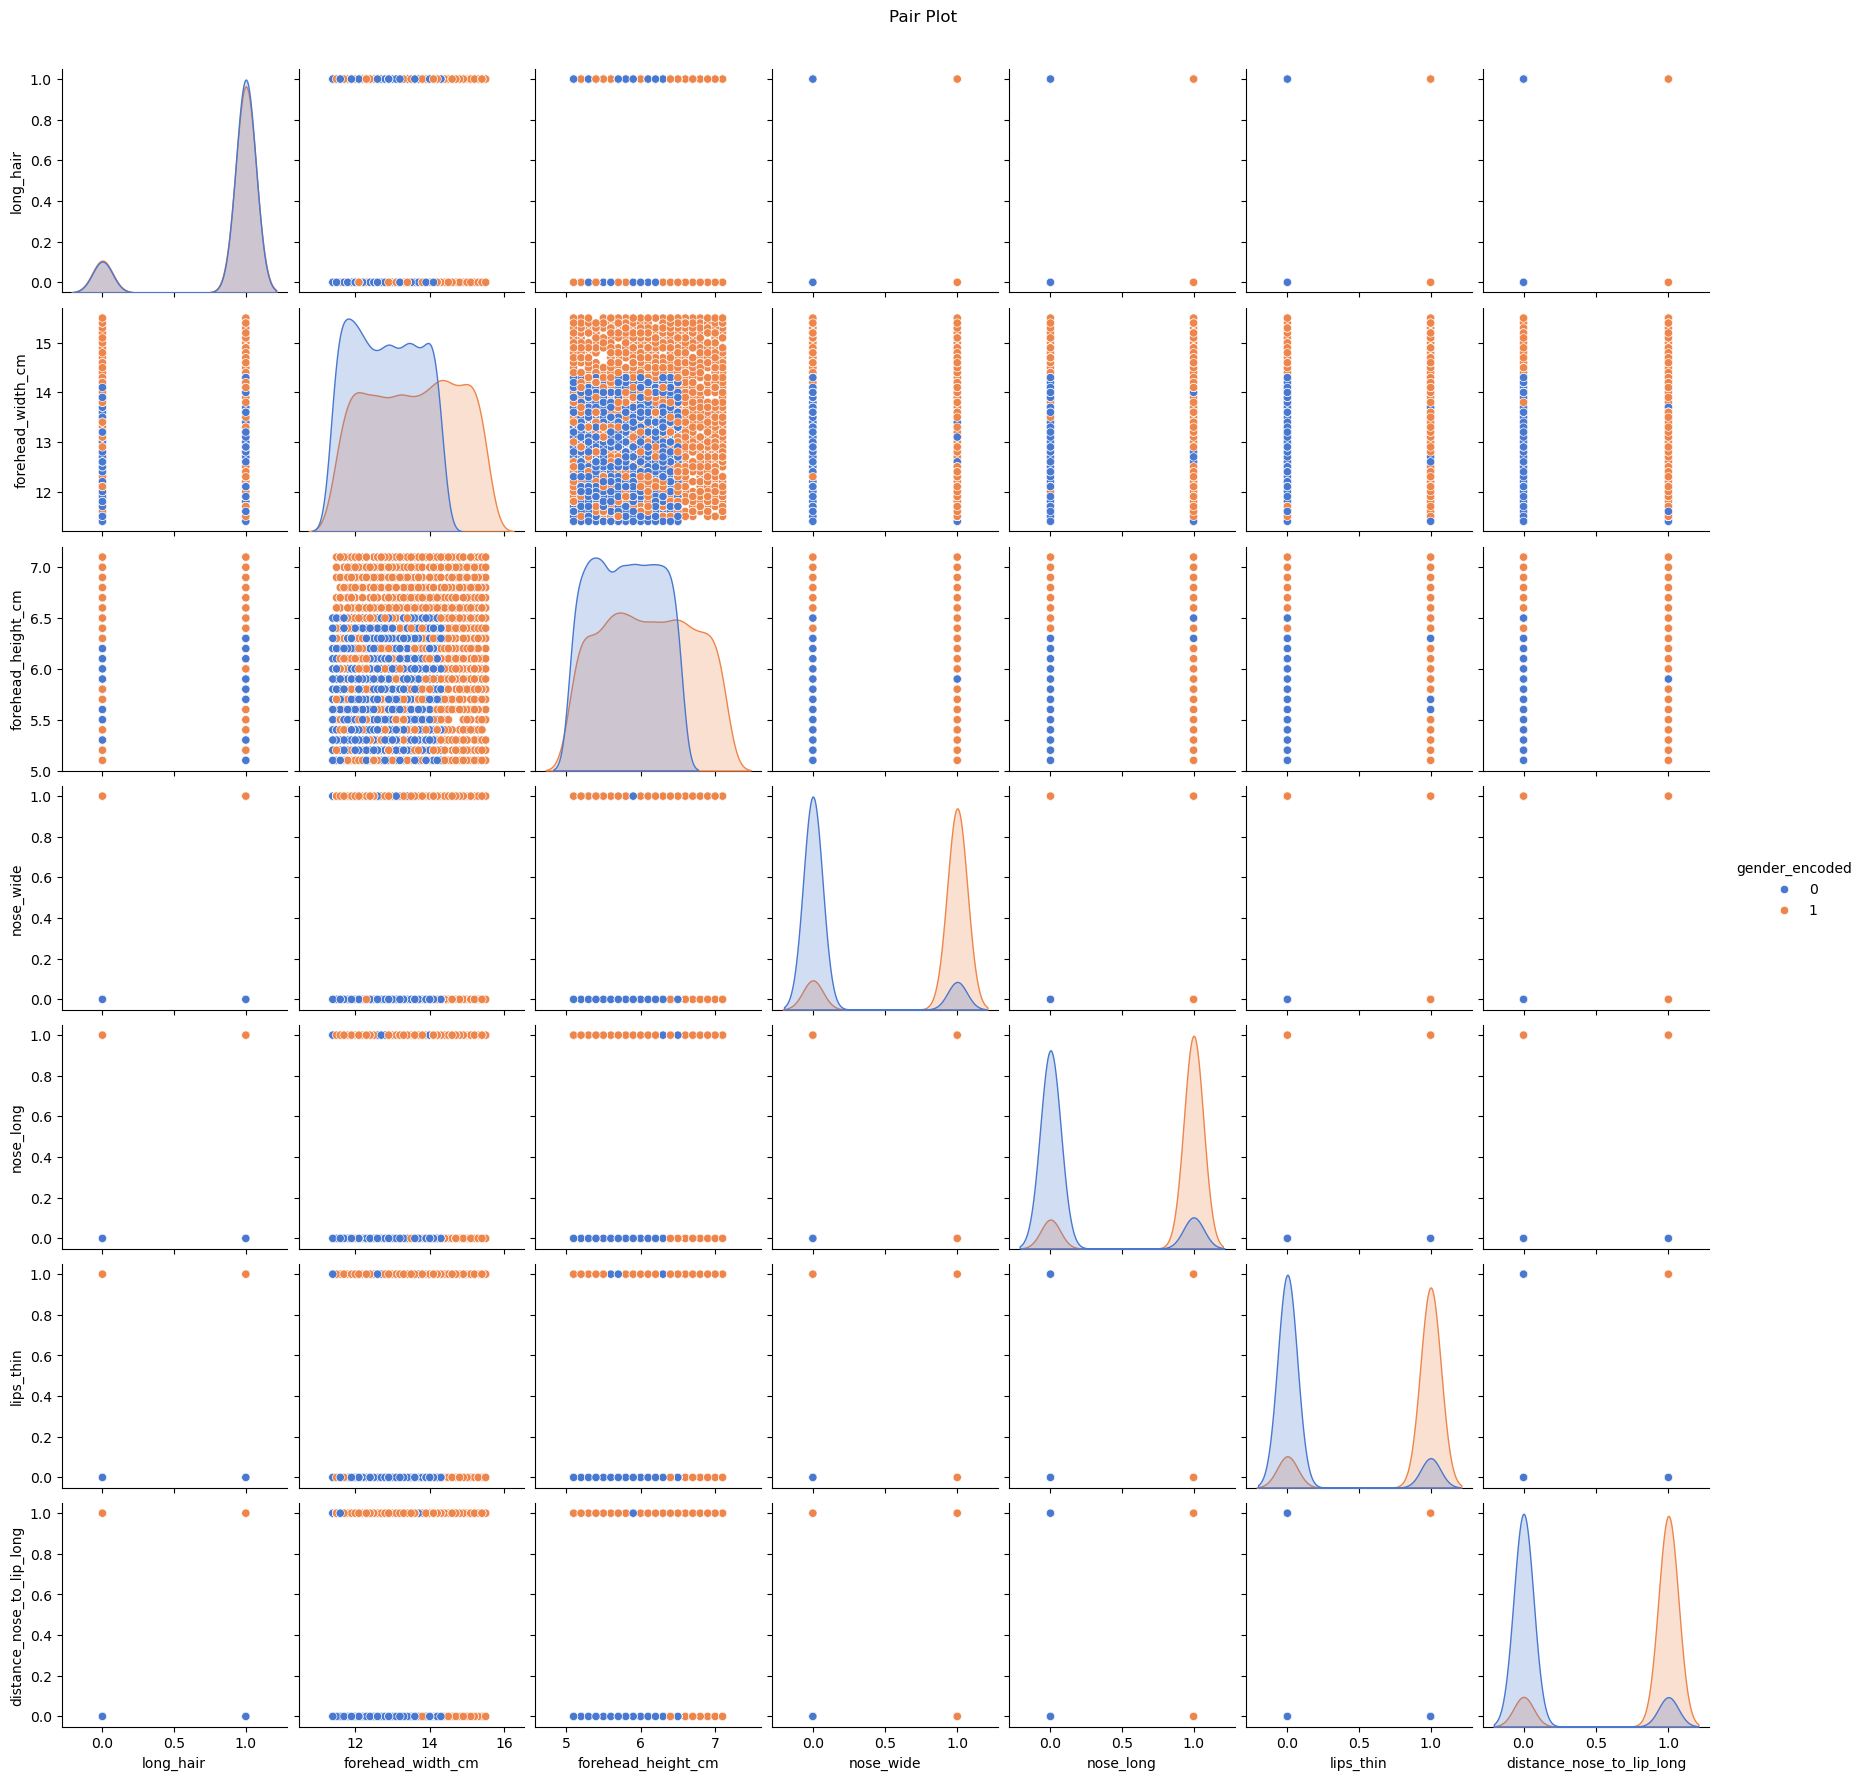

In [60]:
sns.pairplot(df, hue="gender_encoded", palette="muted") 
plt.suptitle("Pair Plot", y=1.02)
plt.show()

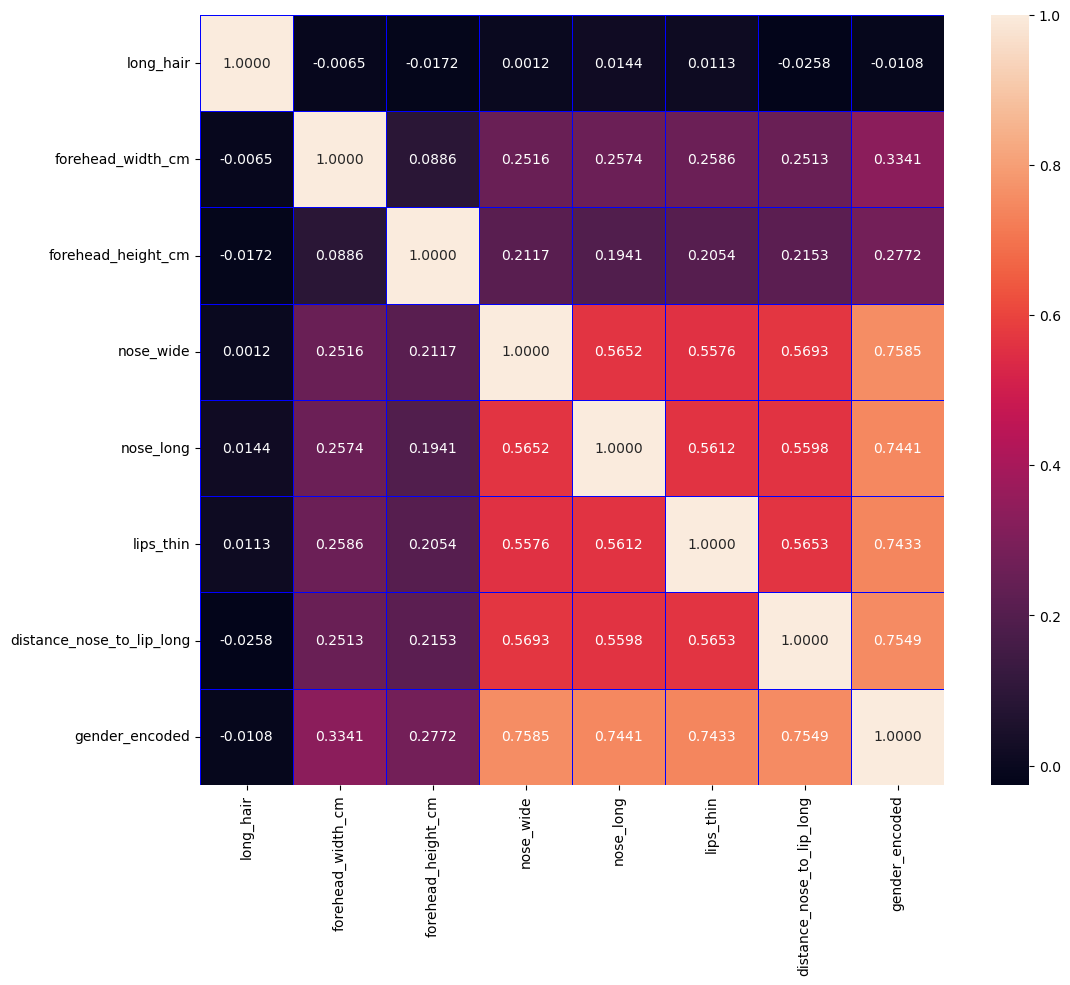

In [61]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

In [62]:
X = df.drop(columns='gender_encoded', axis=1)
y = df['gender_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

#The basic features in the data set are continuously evaluated. However, let's try the naive bayes algorithms one by one.

In [64]:
# We implement StandardScaler.
scaler_gaussian = StandardScaler()
X_train_scaled_gaussian = scaler_gaussian.fit_transform(X_train)
X_test_scaled_gaussian = scaler_gaussian.transform(X_test)
# We create and train the Gaussian Naive Bayes model.
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled_gaussian, y_train)
# We make predictions on test data.
y_pred_gaussian = gaussian_nb.predict(X_test_scaled_gaussian)
# We evaluate the model.
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Gaussian Naive Bayes Results:", accuracy_gaussian)
print("Classification Report:")
print(classification_report(y_test, y_pred_gaussian))
print("-" * 50)




# We implement MinMaxScaler 
scaler_multinomial = MinMaxScaler()
X_train_scaled_multinomial = scaler_multinomial.fit_transform(X_train)
X_test_scaled_multinomial = scaler_multinomial.transform(X_test)
# We created and trained the Multinomial Naive Bayes model.
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_scaled_multinomial, y_train)
# We make predictions on test data.
y_pred_multinomial = multinomial_nb.predict(X_test_scaled_multinomial)
# We evaluate the model.
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Multinomial Naive Bayes Results:", accuracy_multinomial)
print("Classification Report:")
print(classification_report(y_test, y_pred_multinomial))
print("-" * 50)





# We implement Binarizer 
binarizer = Binarizer(threshold=0.0) 
X_train_binarized = binarizer.fit_transform(X_train)
X_test_binarized = binarizer.transform(X_test)
# We created and trained the Bernoulli Naive Bayes model.
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_binarized, y_train)
# We make predictions on test data.
y_pred_bernoulli = bernoulli_nb.predict(X_test_binarized)
# We evaluate the model.
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Bernoulli Naive Bayes Results:", accuracy_bernoulli)
print("Classification Report:")
print(classification_report(y_test, y_pred_bernoulli))
print("-" * 50)





#We implement KBinsDiscretizer 
#We determine how many categories will be divided into with the n bins parameter.
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_categorical = discretizer.fit_transform(X_train)
X_test_categorical = discretizer.transform(X_test)
# We created and trained the Categorical Naive Bayes model
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train_categorical, y_train)
# We make predictions on test data.
y_pred_categorical = categorical_nb.predict(X_test_categorical)
# We evaluate the model.
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print("Categorical Naive Bayes Results:", accuracy_categorical)
print("Classification Report:")
print(classification_report(y_test, y_pred_categorical))

Gaussian Naive Bayes Results: 0.964035964035964
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

--------------------------------------------------
Multinomial Naive Bayes Results: 0.9270729270729271
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       502
           1       0.88      0.99      0.93       499

    accuracy                           0.93      1001
   macro avg       0.93      0.93      0.93      1001
weighted avg       0.93      0.93      0.93      1001

--------------------------------------------------
Bernoulli Naive Bayes Results: 0.957042957042957
Classification Report:
              precision   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [69]:
from sklearn.linear_model import LogisticRegression
#Let's train using logistic regression

In [70]:
scaler = StandardScaler()
X_train_scaled_logistic = scaler.fit_transform(X_train)
X_test_scaled_logistic = scaler.transform(X_test)


logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled_logistic, y_train)


y_pred_logistic = logistic_regression.predict(X_test_scaled_logistic)


accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Results:", accuracy_logistic)
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results: 0.961038961038961
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

